# Intelligent Complaint Analysis for Financial Services

-------------------------------------------------------------------------------------------------

#### EDA

----------------------------------------------------------------------

#### Loading packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [4]:
df = pd.read_csv('../data/complaints.csv', low_memory=False)

#### Shape of data

In [6]:
df.shape

(9609797, 18)

#### Columns

In [7]:
df.columns.tolist()

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

#### The first five records

In [8]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


#### Data types

In [9]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

#### Missign values per columns

In [11]:
missed_data = df.isnull().sum().sort_values(ascending=False)

In [12]:
missed_data

Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
Sub-issue                        839522
Sub-product                      235295
State                             54516
ZIP code                          30228
Company response to consumer         20
Issue                                 6
Date received                         0
Product                               0
Company                               0
Date sent to company                  0
Submitted via                         0
Timely response?                      0
Complaint ID                          0
dtype: int64

#### Missed data percentage

In [13]:
missed_data_percentage = (missed_data / df.shape[0]) * 100

In [14]:
missed_data_percentage

Tags                            93.457011
Consumer disputed?              92.005044
Consumer complaint narrative    68.982113
Company public response         49.638999
Consumer consent provided?      17.165409
Sub-issue                        8.736105
Sub-product                      2.448491
State                            0.567296
ZIP code                         0.314554
Company response to consumer     0.000208
Issue                            0.000062
Date received                    0.000000
Product                          0.000000
Company                          0.000000
Date sent to company             0.000000
Submitted via                    0.000000
Timely response?                 0.000000
Complaint ID                     0.000000
dtype: float64

#### Analyze Distribution of Products

C:\Users\girmachew\AppData\Local\Temp\ipykernel_15796\812361302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index, palette='viridis')


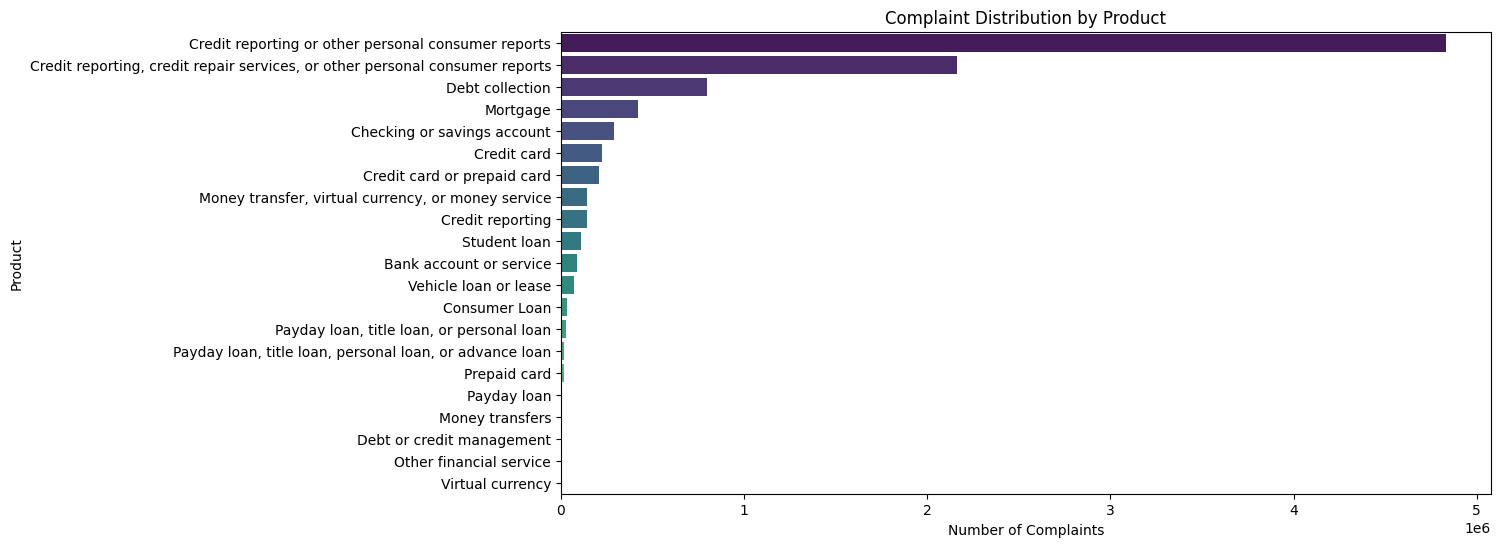

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index, palette='viridis')
plt.title('Complaint Distribution by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()


#### Check Narrative Lengths (Word Count)


In [ ]:
df['narrative_word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()) if pd.notnull(x) else 0)


In [19]:
df['narrative_word_count'].describe()


count    9.609797e+06
mean     5.515649e+01
std      1.495169e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64

#### Visualize Word Count Distribution

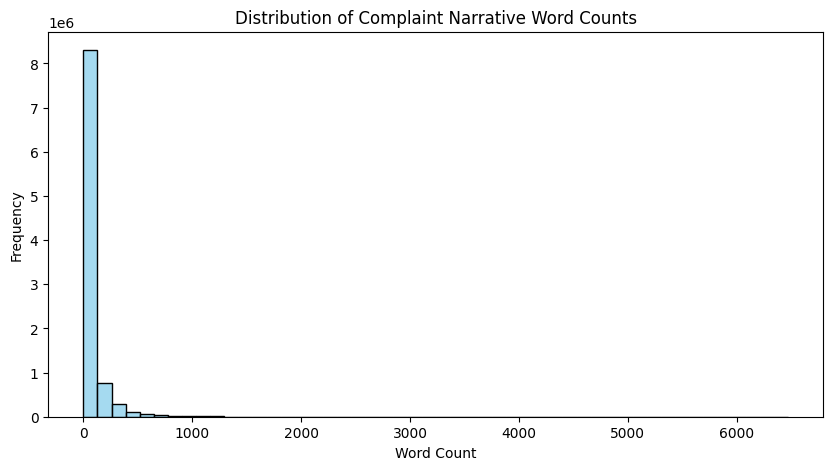

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_word_count'], bins=50, color='skyblue')
plt.title('Distribution of Complaint Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


#### Outlier Check

In [21]:
print("Complaints with <10 words:", (df['narrative_word_count'] < 10).sum())
print("Complaints with >500 words:", (df['narrative_word_count'] > 500).sum())


Complaints with <10 words: 6650979
Complaints with >500 words: 160989


#### Number of Complaints With and Without Narrative

Complaints with narrative: 2980756
Complaints without narrative: 6629041


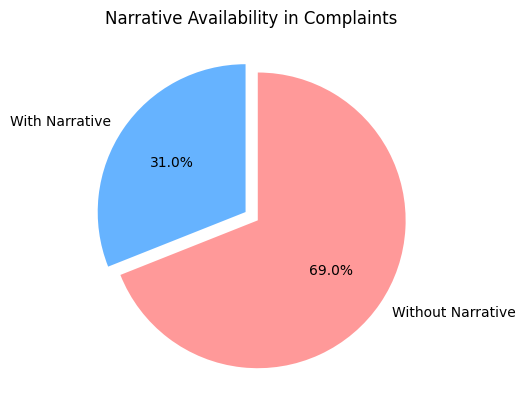

In [22]:
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"Complaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")

plt.pie([with_narrative, without_narrative],
        labels=['With Narrative', 'Without Narrative'],
        autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'],
        startangle=90,
        explode=(0.05, 0.05))
plt.title('Narrative Availability in Complaints')
plt.show()

#### Date Distribution

C:\Users\girmachew\AppData\Local\Temp\ipykernel_15796\1521654787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='muted')


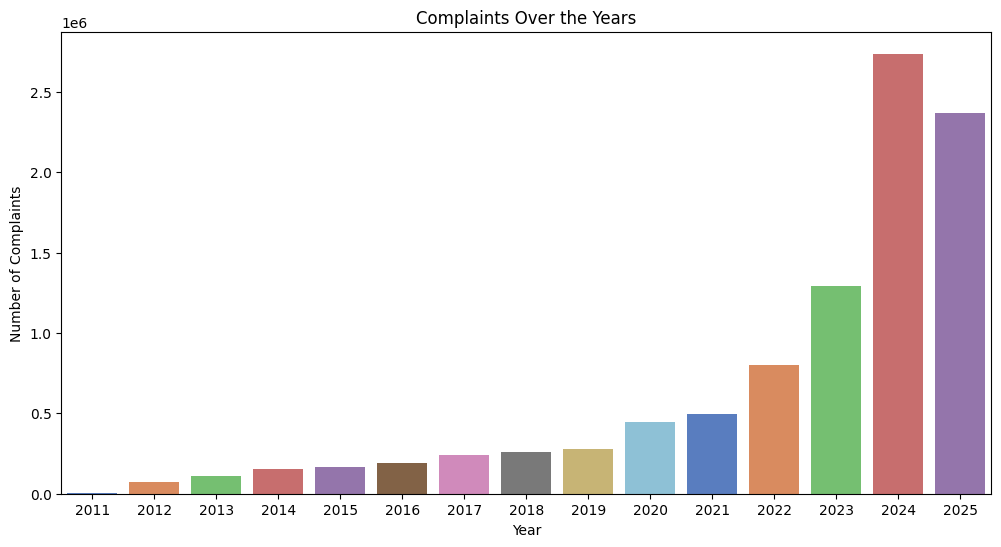

In [23]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year'] = df['Date received'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', palette='muted')
plt.title('Complaints Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.show()


#### Identify Product Distribution After Filtering

Filtered dataset shape: (82164, 20)


C:\Users\girmachew\AppData\Local\Temp\ipykernel_15796\1600917209.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y='Product', order=filtered_df['Product'].value_counts().index, palette='pastel')


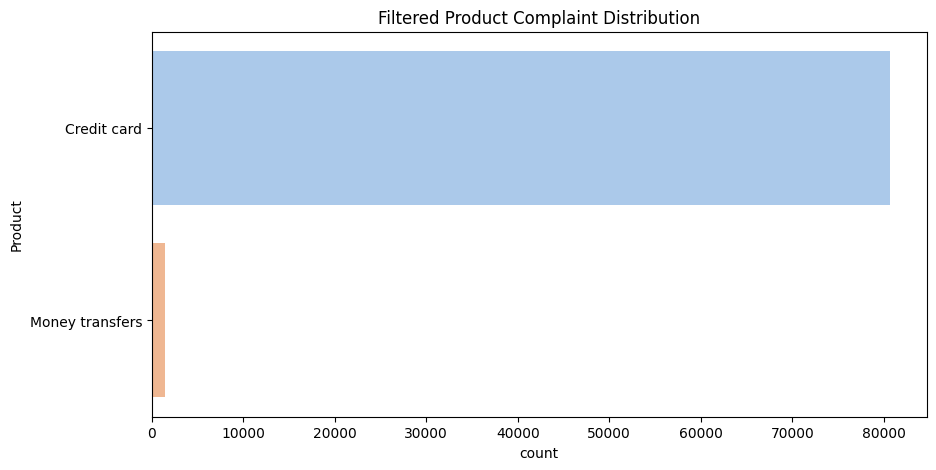

In [24]:
target_products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 'Savings account', 'Money transfers']

# Filter
filtered_df = df[
    df['Product'].isin(target_products) & 
    df['Consumer complaint narrative'].notnull() &
    (df['Consumer complaint narrative'].str.strip() != '')
]

print(f"Filtered dataset shape: {filtered_df.shape}")

# Plot again
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, y='Product', order=filtered_df['Product'].value_counts().index, palette='pastel')
plt.title('Filtered Product Complaint Distribution')
plt.show()


#### Text Cleaning

In [25]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and digits
    text = re.sub(r'\b(i am writing to file a complaint|to whom it may concern|dear sir|regards)\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['clean_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

# Preview
filtered_df[['Consumer complaint narrative', 'clean_narrative']].head()


C:\Users\girmachew\AppData\Local\Temp\ipykernel_15796\870648792.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clean_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


,Consumer complaint narrative,clean_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb i have a secured credit card with ci...
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards the credit balance...
13955,b'I am writing to dispute the following charge...,bi am writing to dispute the following charges...
14249,"Although the account had been deemed closed, I...",although the account had been deemed closed i ...


#### Save Cleaned Data

In [ ]:
filtered_df.to_csv('../data/filtered_complaints.csv', index=False)